In [20]:
from fredapi import Fred
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [21]:
dataset = pd.read_csv('/Users/henry/Documents/quant_credit/data/macro_data_daily.csv', index_col=0, parse_dates=True)


In [22]:
dataset.describe()

,BofA US Corp OAS,BofA US HY OAS,BofA Euro HY OAS,VIX,US 2s10s Spread,UST 10yr yield,UST 2yr yield,DXY,EURUSD,S&P 500
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,1.229858,4.176618,3.923946,18.488650,0.392924,2.658058,2.265134,117.035069,1.119400,3678.705799
std,0.335755,1.201544,0.961331,7.367375,0.592833,1.160045,1.595191,4.991358,0.053625,1231.525839
min,0.740000,2.590000,2.330000,9.140000,-1.080000,0.520000,0.090000,106.487700,0.961600,1829.080000
25%,0.990000,3.380000,3.180000,13.492500,0.090000,1.730000,0.840000,113.187800,1.082925,2672.835000
50%,1.190000,3.850000,3.650000,16.640000,0.430000,2.480000,1.955000,116.146350,1.115600,3481.035000
75%,1.380000,4.600000,4.540000,21.497500,0.860000,3.760000,3.910000,120.968850,1.162275,4462.132500
max,4.010000,10.870000,8.660000,82.690000,1.590000,4.980000,5.190000,130.214200,1.248800,6753.720000


In [23]:
dataset_zscores = (dataset - dataset.mean()) / dataset.std()

dataset_zscores.describe()

,BofA US Corp OAS,BofA US HY OAS,BofA Euro HY OAS,VIX,US 2s10s Spread,UST 10yr yield,UST 2yr yield,DXY,EURUSD,S&P 500
count,2.466000e+03,2.466000e+03,2.466000e+03,2.466000e+03,2.466000e+03,2.466000e+03,2.466000e+03,2.466000e+03,2.466000e+03,2.466000e+03
mean,2.766103e-16,-5.762715e-16,-1.383052e-16,2.189832e-16,-6.915258e-17,9.220344e-17,1.383052e-16,1.521357e-15,1.244746e-15,9.220344e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.458976e+00,-1.320482e+00,-1.658061e+00,-1.268925e+00,-2.484549e+00,-1.843081e+00,-1.363557e+00,-2.113126e+00,-2.942658e+00,-1.501898e+00
25%,-7.143846e-01,-6.629952e-01,-7.738704e-01,-6.781452e-01,-5.109762e-01,-8.000185e-01,-8.933938e-01,-7.707859e-01,-6.801819e-01,-8.167679e-01
50%,-1.187118e-01,-2.718319e-01,-2.849649e-01,-2.509238e-01,6.254073e-02,-1.534919e-01,-1.944180e-01,-1.780515e-01,-7.085658e-02,-1.605089e-01
75%,4.471773e-01,3.523649e-01,6.408347e-01,4.084020e-01,7.878710e-01,9.499133e-01,1.031141e+00,7.881184e-01,7.995416e-01,6.361431e-01
max,8.280274e+00,5.570650e+00,4.926559e+00,8.714278e+00,2.019246e+00,2.001596e+00,1.833552e+00,2.640390e+00,2.413065e+00,2.496914e+00


In [24]:
# have to invert the 2s10s slope z-score since more negative here will generally be a more 'stressed' move.
# also dropping S&P 500, EURUSD, DXY as the levels of these wouldn't necessarily correlate to a stressed period in credit

dataset_zscores['US 2s10s Spread'] =  dataset_zscores['US 2s10s Spread']*-1
dataset_zscores = dataset_zscores.drop(columns=['S&P 500', 'EURUSD', 'DXY'])

<Axes: xlabel='Date'>

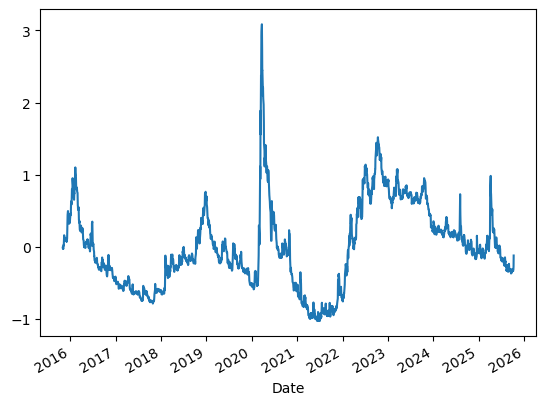

In [26]:
# combining z-scores into a single indicator to assess credit market conditions
# this will be used as a signal for risk on/risk off

dataset_zscores['credit conditions index'] = dataset_zscores.mean(axis=1)
dataset_zscores['credit conditions index'].plot()

<Axes: xlabel='Date'>

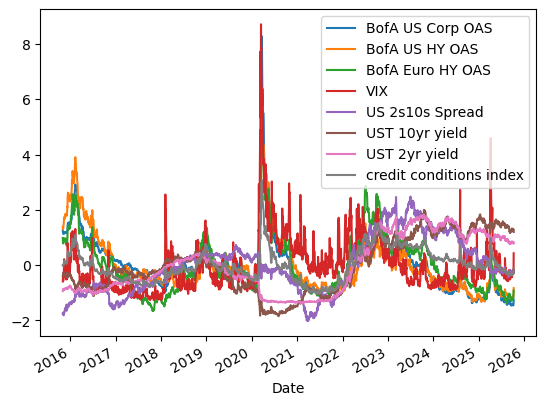

In [27]:
dataset_zscores.plot()

/var/folders/5f/wdk48wx96tl8spk9z_l8kr280000gn/T/ipykernel_27379/644116577.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download('LQD', start='2015-11-02')['Close'].pct_change(),
[*********************100%***********************]  1 of 1 completed
/var/folders/5f/wdk48wx96tl8spk9z_l8kr280000gn/T/ipykernel_27379/644116577.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download('IEF', start='2015-11-02')['Close'].pct_change()
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

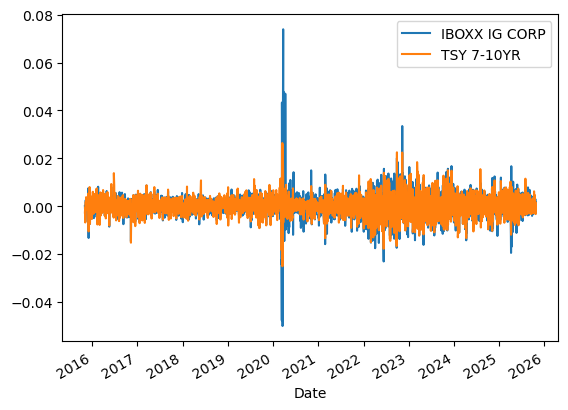

In [36]:
# retrieving mkt index total returns data from yahoo finance

market_returns = pd.concat([
    yf.download('LQD', start='2015-11-02')['Close'].pct_change(),
    yf.download('IEF', start='2015-11-02')['Close'].pct_change()
], axis=1)
market_returns.columns = ['IBOXX IG CORP', 'TSY 7-10YR']
market_returns.plot()


In [37]:
# ensuring alignment of dates, combining the z-scores dataframe with the daily returns on the 2 indices

start = max(dataset_zscores.index.min(), market_returns.index.min())
end = min(dataset_zscores.index.max(), market_returns.index.max())

data_zscores = dataset_zscores.loc[start:end]
market_returns = market_returns.loc[start:end]

market_data_full = dataset_zscores.join(market_returns, how='inner')

market_data_full

,BofA US Corp OAS,BofA US HY OAS,BofA Euro HY OAS,VIX,US 2s10s Spread,UST 10yr yield,UST 2yr yield,credit conditions index,IBOXX IG CORP,TSY 7-10YR
Date,,,,,,,,,,
2015-11-02,1.251336,1.384370,0.984109,-0.588900,-1.749355,-0.394862,-0.937276,-0.007226,NaN,NaN
2015-11-03,1.221552,1.326112,0.890489,-0.535964,-1.749355,-0.369001,-0.918469,-0.019234,0.000086,-0.002628
2015-11-04,1.191768,1.292821,0.807271,-0.404303,-1.715619,-0.351760,-0.893394,-0.010459,-0.001124,-0.001035
2015-11-05,1.161985,1.351080,0.817673,-0.466740,-1.715619,-0.343140,-0.887125,-0.011698,0.000260,-0.000659
2015-11-06,1.132201,1.367725,0.786466,-0.564468,-1.766223,-0.274177,-0.855781,-0.024894,-0.006494,-0.006787
...,...,...,...,...,...,...,...,...,...,...
2025-10-06,-1.458976,-1.178998,-1.221167,-0.287572,-0.315563,1.311968,0.836806,-0.330500,-0.003227,-0.002905
2025-10-07,-1.429192,-1.129062,-1.179558,-0.169484,-0.298695,1.277487,0.818000,-0.301501,0.001889,0.002497
2025-10-08,-1.429192,-1.112417,-1.096340,-0.297073,-0.264958,1.268866,0.824269,-0.300978,-0.001257,0.000208


In [38]:
# creating a basic buy/sell signal based on the constructed indicator. 
# dropping first row since no signal for first date

market_data_full['signal'] = (market_data_full['credit conditions index'] < 0).shift(1)  # risk on when CCI < 0
market_data_full = market_data_full.dropna()
market_data_full['strategy'] = market_data_full['signal'] * market_data_full['IBOXX IG CORP'] + ~market_data_full['signal'] * market_data_full['TSY 7-10YR']

market_data_full

/var/folders/5f/wdk48wx96tl8spk9z_l8kr280000gn/T/ipykernel_27379/2346525295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data_full['strategy'] = market_data_full['signal'] * market_data_full['IBOXX IG CORP'] + ~market_data_full['signal'] * market_data_full['TSY 7-10YR']


,BofA US Corp OAS,BofA US HY OAS,BofA Euro HY OAS,VIX,US 2s10s Spread,UST 10yr yield,UST 2yr yield,credit conditions index,IBOXX IG CORP,TSY 7-10YR,signal,strategy
Date,,,,,,,,,,,,
2015-11-03,1.221552,1.326112,0.890489,-0.535964,-1.749355,-0.369001,-0.918469,-0.019234,0.000086,-0.002628,True,0.005343
2015-11-04,1.191768,1.292821,0.807271,-0.404303,-1.715619,-0.351760,-0.893394,-0.010459,-0.001124,-0.001035,True,0.000945
2015-11-05,1.161985,1.351080,0.817673,-0.466740,-1.715619,-0.343140,-0.887125,-0.011698,0.000260,-0.000659,True,0.001578
2015-11-06,1.132201,1.367725,0.786466,-0.564468,-1.766223,-0.274177,-0.855781,-0.024894,-0.006494,-0.006787,True,0.00708
2015-11-09,1.132201,1.467596,0.828075,-0.267212,-1.816828,-0.256936,-0.862050,0.032121,-0.001656,-0.001709,True,0.001762
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-06,-1.458976,-1.178998,-1.221167,-0.287572,-0.315563,1.311968,0.836806,-0.330500,-0.003227,-0.002905,True,0.002582
2025-10-07,-1.429192,-1.129062,-1.179558,-0.169484,-0.298695,1.277487,0.818000,-0.301501,0.001889,0.002497,True,-0.003105
2025-10-08,-1.429192,-1.112417,-1.096340,-0.297073,-0.264958,1.268866,0.824269,-0.300978,-0.001257,0.000208,True,-0.001672


/var/folders/5f/wdk48wx96tl8spk9z_l8kr280000gn/T/ipykernel_27379/1499711357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data_full['strategy cumulative'] = (1 + market_data_full['strategy']).cumprod()


<Axes: xlabel='Date'>

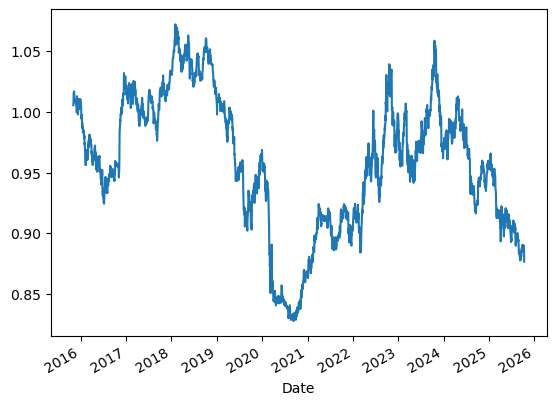

In [39]:
market_data_full['strategy cumulative'] = (1 + market_data_full['strategy']).cumprod()

market_data_full['strategy cumulative'].plot()

In [ ]:
# this method loses money overall which I think is due to a combo of (i) too long lookback taking a single mean 
# and (ii) seems to be weighted too heavily towards OAS levels where there's probably some overlap 

# constructing z-scores over shorter window should improve this